## Business Problem.

**- Microsoft sees all the big companies creating original video content and they want to get in on the fun.**

**- They have decided to create a new movie studio, but they don’t know anything about creating movies.**

**- You are charged with exploring what types of films are currently doing the best at the box office.**

**- You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.**

## Data Collection.
**- After analyzing the business problem,I have decided to determine which movies made the most profit at the box office and use the profit as a measure of the movies' performance.**

**-With that,I have obtained the 'movie_gross' dataset(already availed by the institution from Kaggle) which I am going to use for my analysis.**

**-This dataset gives information on the revenue generated from different movies from the time period 2010-2018.**


## Data Processing and Transformation.
**- I now want to proceed on with loading,cleaning and transforming the dataset so as to make it ready for data analysis.**


In [171]:
## Import relevant libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
# Load the 'movie_gross' dataset into the notebook in form of a dataframe.
movie_gross=pd.read_csv('C:/Users/dv/Desktop/Moringa School/Project 1-Exploratory Data Analysis/bom.movie_gross.csv')

In [182]:
#Preview the movie_gross df to ensure that it loaded correctly.
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [183]:
#Obtain information about the movie_gross df.
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [184]:
# Calculate the percentage of null values in each column
null_counts=movie_gross.isnull().sum()
total_values = movie_gross.size
percentage_null = (null_counts / total_values) * 100
# Display the results
print(percentage_null)

title            0.00
studio           0.03
domestic_gross   0.17
foreign_gross    7.97
year             0.00
dtype: float64


In [185]:
# Drop the null values as they are insignificant to the overrall size of tge dataset.
movie_gross=movie_gross.dropna()
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [186]:
#Update the column names of 'domestic_gross' and 'foreign_gross' columns to indicate that they contain currency values.
movie_gross.rename(columns={'domestic_gross': 'domestic_gross($)'}, inplace=True)
movie_gross.rename(columns={'foreign_gross': 'foreign_gross($)'}, inplace=True)

In [187]:
#Convert the data values in the 'domestic_gross' and 'foreign_gross' columns into numerical values.
movie_gross['domestic_gross($)'] = pd.to_numeric(movie_gross['domestic_gross($)'], errors='coerce')
movie_gross['foreign_gross($)'] = pd.to_numeric(movie_gross['foreign_gross($)'], errors='coerce')


In [188]:
#Feature engineer a 'Total_gross' column by adding the 'domestic_gross' column and the 'foreign_column'.
movie_gross['Total_gross($)'] = movie_gross['domestic_gross($)'] + movie_gross['foreign_gross($)']

In [190]:
#Format the 'Total_gross' column .
movie_gross['Total_gross($)'] = movie_gross['Total_gross($)'].map('{:,.2f}'.format)

# Remove commas from the 'Total_gross($)' column
movie_gross['Total_gross($)'] = movie_gross['Total_gross($)'].str.replace(',', '')


In [191]:
#I would have loved to list out the studio names in full, however,I am not familiar with the studios.

# I also wanted to check if there exists an outlier in the year column.But no outlier exists.
movie_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [197]:
# Convert the column name "title" to "movie_title" so as the column name is more intuitive.
movie_gross = movie_gross.rename(columns={'title': 'movie_title'})

In [196]:
# Convert the column name "year" to "release_year" so as the column name is more intuitive.
movie_gross = movie_gross.rename(columns={'year': 'release_year'})

In [194]:
#set the movie_title column as the index of the data frame.
movie_gross=movie_gross.set_index('movie_title')

In [198]:
#For aesthetics,I capitalized the column names.
movie_gross.columns = movie_gross.columns.str.capitalize()

In [199]:
movie_gross['Total_gross($)'] = movie_gross['Total_gross($)'].astype(float)

In [200]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [201]:
## Preview the cleaned and transformed 'movie_gross' dataset to ensure that it has been formatted upto standard.
movie_gross.head()

,Studio,Domestic_gross($),Foreign_gross($),Release_year,Total_gross($)
movie_title,,,,,
Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00
Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00
Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00
Inception,WB,292600000.00,535700000.00,2010,828300000.00
Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00


## Performing EDA On The Cleaned and Transformed Dataset.

In [202]:
# Compute summary statistics for the currency columns.This gives a general overview of the data at a glance.
selected_columns = ['Domestic_gross($)', 'Foreign_gross($)', 'Total_gross($)']
summary = movie_gross[selected_columns].describe()
summary                    

,Domestic_gross($),Foreign_gross($),Total_gross($)
count,2007.00,2002.00,2002.00
mean,47019840.20,75979668.67,121694963.02
std,81626889.32,138300072.98,206224497.68
min,400.00,600.00,4900.00
25%,670000.00,4000000.00,8155750.00
50%,16700000.00,19600000.00,42200000.00
75%,56050000.00,76450000.00,132775000.00
max,936700000.00,960500000.00,1518900000.00


In [203]:
#Top 1% Movies in term of Total gross income generation.WHATS THE MOST DOMINANT GENRE OF THESE MOVIES??
movie_gross= movie_gross.reset_index()

# Sort the movies by total gross income in descending order
sorted_df = movie_gross.sort_values(by='Total_gross($)', ascending=False)

# Calculate the number of movies that make up the top 10%
total_movies = len(sorted_df)
top_1_percent = int(total_movies * 0.010)

# Select the top 10% earning movies
top_1_percent_movies = sorted_df.head(top_1_percent)

# Display the top 10% earning movies
top_1_percent_movies

,movie_title,Studio,Domestic_gross($),Foreign_gross($),Release_year,Total_gross($)
598,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
1278,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
1835,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
308,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
1657,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00
1836,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00
841,Frozen,BV,400700000.00,875700000.00,2013,1276400000.00
1658,Beauty and the Beast (2017),BV,504000000.00,759500000.00,2017,1263500000.00
1837,Incredibles 2,BV,608600000.00,634200000.00,2018,1242800000.00
842,Iron Man 3,BV,409000000.00,805800000.00,2013,1214800000.00


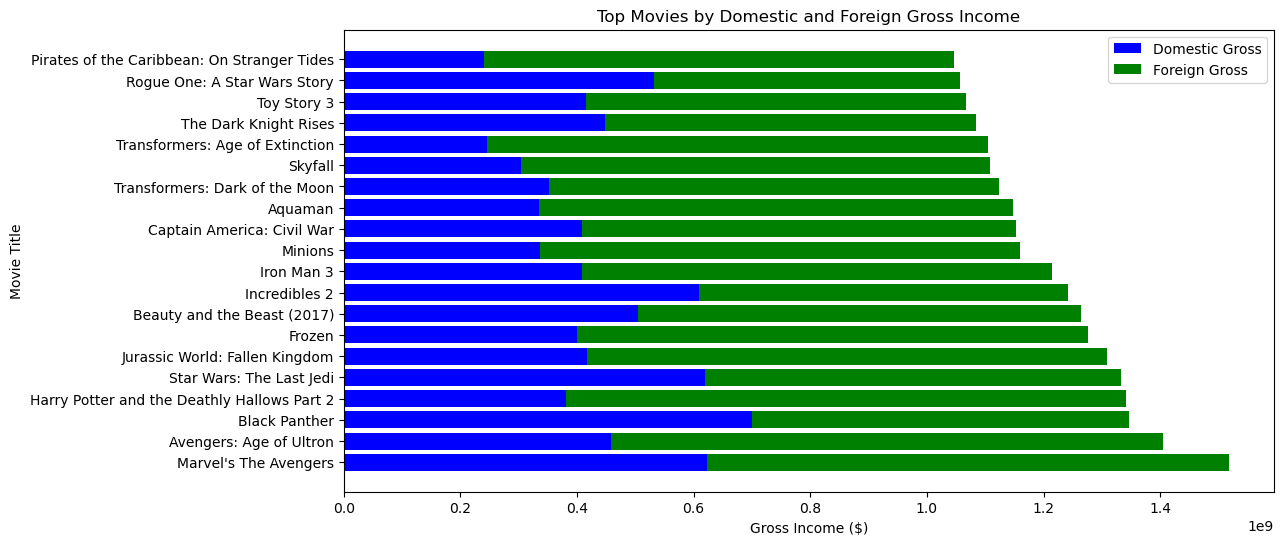

In [159]:
## Visualized the top_1_percent movies using a barh graph...Its clear to see that income was majorly from the foreign market.

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bahr graph
plt.barh(top_1_percent_movies['movie_title'],top_1_percent_movies ['Domestic_gross($)'], label='Domestic Gross', color='b')
plt.barh(top_1_percent_movies['movie_title'], top_1_percent_movies['Foreign_gross($)'], label='Foreign Gross', color='g', left=top_1_percent_movies['Domestic_gross($)'])

# Set the labels and title
plt.xlabel('Gross Income ($)')
plt.ylabel('Movie Title')
plt.title('Top Movies by Domestic and Foreign Gross Income')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [204]:
#A glance at the movie tittles of the top_1_percent movies.Using my domain knowledge,I was able notice a sequal&pre-sequel trend in the movies at this category.
top_1_percent_movies['movie_title'].sort_values()


1838                                        Aquaman
1278                        Avengers: Age of Ultron
1658                    Beauty and the Beast (2017)
1835                                  Black Panther
1465                     Captain America: Civil War
841                                          Frozen
308     Harry Potter and the Deathly Hallows Part 2
1837                                  Incredibles 2
842                                      Iron Man 3
1836                 Jurassic World: Fallen Kingdom
598                           Marvel's The Avengers
1279                                        Minions
310     Pirates of the Caribbean: On Stranger Tides
1466                   Rogue One: A Star Wars Story
599                                         Skyfall
1657                       Star Wars: The Last Jedi
600                           The Dark Knight Rises
0                                       Toy Story 3
1041                Transformers: Age of Extinction
309         

In [205]:
#Bottom 1% Movies in terms of total gross revenue generation.WHATS THE MOST DOMINANT GENRE IN THESE MOVIES??

# Sort the movies by total gross income in descending order
sorted_df = movie_gross.sort_values(by='Total_gross($)', ascending=True)

# Calculate the number of movies that make up the top 10%
total_movies = len(sorted_df)
bottom_1_percent = int(total_movies * 0.010)

# Select the top 10% earning movies
bottom_1_percent_movies = sorted_df.head(bottom_1_percent)

# Display the top 10% earning movies
bottom_1_percent_movies

,movie_title,Studio,Domestic_gross($),Foreign_gross($),Release_year,Total_gross($)
597,To Die Like a Man,Strand,4000.00,900.00,2011,4900.00
596,Aurora,CGld,5700.00,5100.00,2011,10800.00
840,Cirkus Columbia,Strand,3500.00,9500.00,2012,13000.00
307,The Thorn in the Heart,Osci.,7400.00,10500.00,2010,17900.00
595,I'm Glad My Mother is Alive,Strand,8700.00,13200.00,2011,21900.00
306,Picture Me,Strand,12000.00,10400.00,2010,22400.00
305,Nenette,Kino,18000.00,5400.00,2010,23400.00
594,Brotherhood (2011),P4,19700.00,12700.00,2011,32400.00
304,Daddy Longlegs,IFC,21800.00,11500.00,2010,33300.00
1274,Policeman,Crnth,11300.00,27000.00,2014,38300.00


In [157]:
#A glance at the movie tittles of the top_1_percent movies.Using domain knowledge,I was able to note that this cateory does not contain any sequel or pre-sequel movies.
bottom_1_percent_movies['movie_title'].sort_values()

596                                   Aurora
303                                Bluebeard
300                            Boogie Woogie
594                       Brotherhood (2011)
840                          Cirkus Columbia
301                       Come Undone (2010)
304                           Daddy Longlegs
298                  District B13: Ultimatum
299                                  GasLand
595              I'm Glad My Mother is Alive
297                                   Inhale
1464                         Love Thy Nature
305                                  Nenette
839                          North Sea Texas
306                               Picture Me
1274                               Policeman
302                            The Red Baron
307                   The Thorn in the Heart
597                        To Die Like a Man
1656    Troublemakers: The Story of Land Art
Name: movie_title, dtype: object

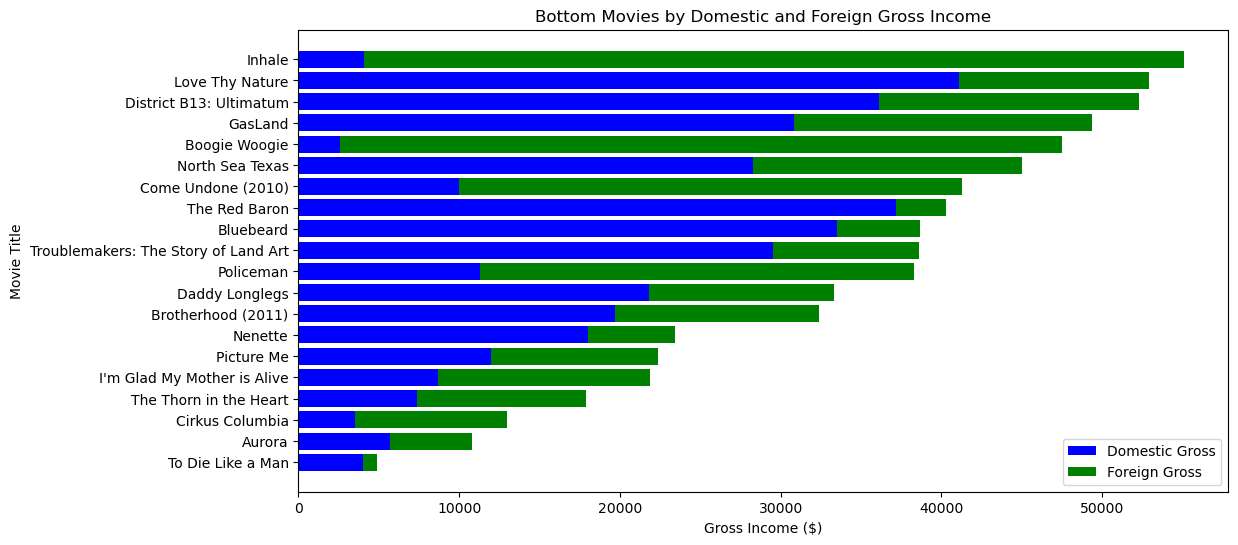

In [206]:
##Visualized the bottom_1_percent movies using a barh graph.
##It is clear to see that majority of the income was from the Foreign market.

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the barh graph
plt.barh(bottom_1_percent_movies['movie_title'],bottom_1_percent_movies ['Domestic_gross($)'], label='Domestic Gross', color='b')
plt.barh(bottom_1_percent_movies['movie_title'], bottom_1_percent_movies['Foreign_gross($)'], label='Foreign Gross', color='g', left=bottom_1_percent_movies['Domestic_gross($)'])

# Set the labels and title
plt.xlabel('Gross Income ($)')
plt.ylabel('Movie Title')
plt.title('Bottom Movies by Domestic and Foreign Gross Income')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [207]:
#group the movie_gross data frame by 'release_year' column.
grouped_by_year = movie_gross.groupby('Release_year')


In [120]:
# Calculate the mean values of the currency columns in the 'grouped_by_year' dataframe.
grouped_by_year_stats = grouped_by_year['Domestic_gross($)','Foreign_gross($)','Total_gross($)'].mean()
print(grouped_by_year_stats)

              Domestic_gross($)  Foreign_gross($)  Total_gross($)
Release_year                                                     
2010                32963448.37       46653802.27     79617250.64
2011                34192034.83       54009886.19     88201921.02
2012                44024132.50       69971131.67    113995264.18
2013                52794252.99       82901211.49    135695464.48
2014                43367451.28       72464391.87    115831843.15
2015                56551941.56       81039321.39    128113486.60
2016                56612985.41       98861402.60    155474388.01
2017                59416764.96      113232568.16    171702837.47
2018                62221729.47      101595867.44    160232839.53


C:\Users\dv\AppData\Local\Temp\ipykernel_3232\4250399011.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_year_stats = grouped_by_year['Domestic_gross($)','Foreign_gross($)','Total_gross($)'].mean()


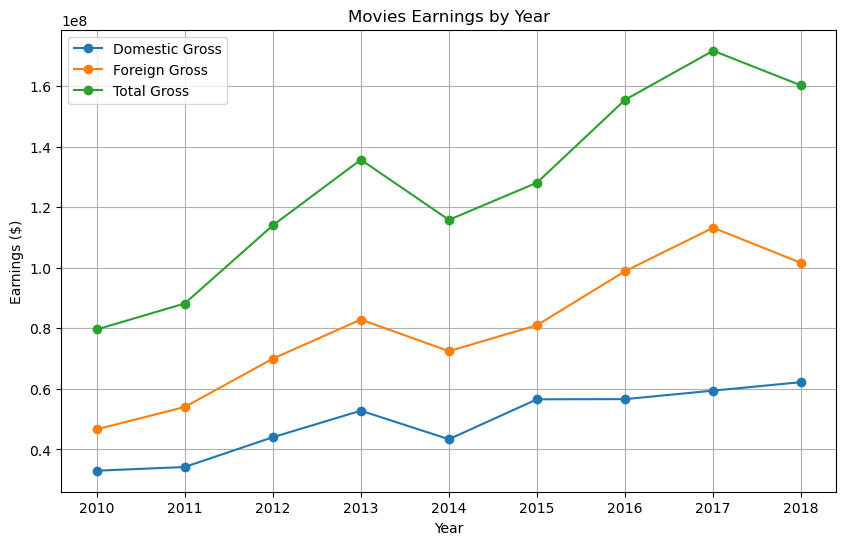

In [122]:
##Display the 'grouped_by_year_stats' dataframe using line graphs.
#Its clear to see that there is an upward trend in terms of movie revenue generation and most revenue is obtained from foreign market.

# Reset the index to have 'Release_year' as a regular column for plottin
grouped_by_year_stats= grouped_by_year_stats.reset_index()

# Create a line plot to show the trend over the years
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_year_stats['Release_year'],grouped_by_year_stats ['Domestic_gross($)'], label='Domestic Gross', marker='o')
plt.plot(grouped_by_year_stats['Release_year'], grouped_by_year_stats['Foreign_gross($)'], label='Foreign Gross', marker='o')
plt.plot(grouped_by_year_stats['Release_year'], grouped_by_year_stats['Total_gross($)'], label='Total Gross', marker='o')

plt.title('Movies Earnings by Year')
plt.xlabel('Year')
plt.ylabel('Earnings ($)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()





In [208]:
##Create a 'grouped_by_studio' df grouping the 'movie_gross' df by 'studio' column.
grouped_by_studio = movie_gross.groupby('Studio')

In [210]:
studio_statistics= grouped_by_studio['Domestic_gross($)','Foreign_gross($)','Total_gross($)'].mean()
print(studio_statistics)

        Domestic_gross($)  Foreign_gross($)  Total_gross($)
Studio                                                     
3D             6100000.00        9900000.00     16000000.00
A24           13708252.63       12550642.11     26258894.74
AF              577500.00        1750000.00      2327500.00
AGF              15800.00         161000.00       176800.00
AR              350000.00       57700000.00     58050000.00
...                   ...               ...             ...
WOW              30800.00          18600.00        49400.00
Wein.         21330676.78       38030231.87     59360908.65
Yash           3745633.33       45460116.67     49205750.00
Zee            1100000.00         571000.00      1671000.00
Zeit.           345840.00        4060000.00      4405840.00

[172 rows x 3 columns]


C:\Users\dv\AppData\Local\Temp\ipykernel_3232\2940457660.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  studio_statistics= grouped_by_studio['Domestic_gross($)','Foreign_gross($)','Total_gross($)'].mean()


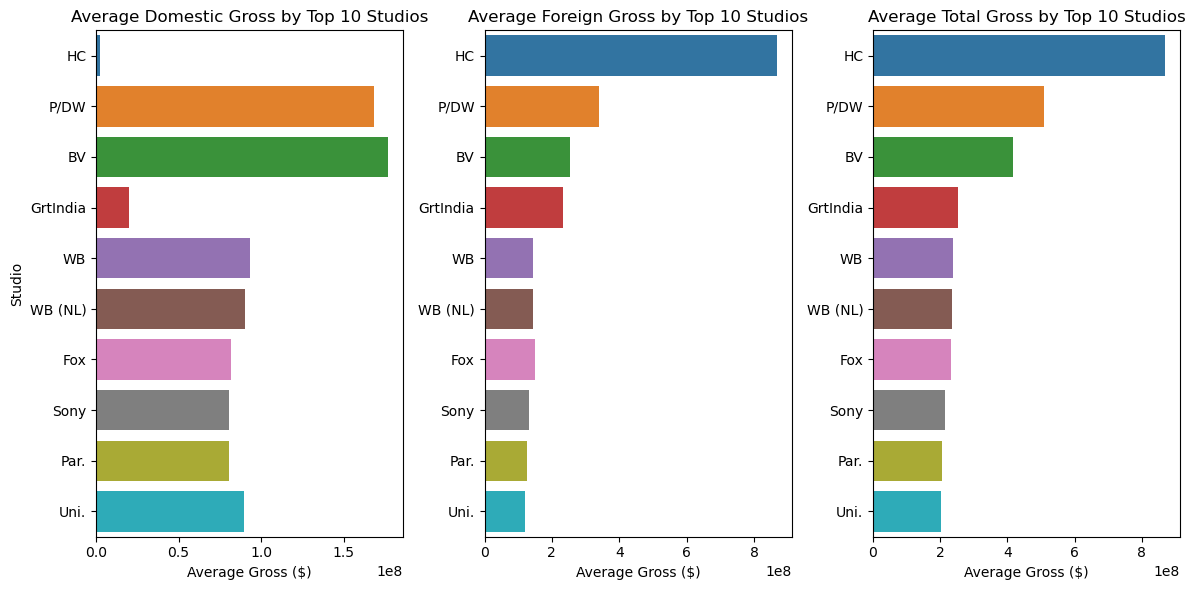

In [211]:
##Plot the 'studio_statistics' df using bar plots.So as to visualize the top 10 best performing studios in terms of revenue generation.

# Reset the index to have 'Studio' as a regular column for plotting
studio_statistics = studio_statistics.reset_index()

# Sort the studios by total gross income in descending order
studio_statistics = studio_statistics.sort_values(by='Total_gross($)', ascending=False)

# Select the top 10 studios
top_10_studios = studio_statistics.head(10)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create subplots for each type of gross (Domestic, Foreign, Total) for the top 10 studios
plt.subplot(131)
sns.barplot(x='Domestic_gross($)', y='Studio', data=top_10_studios, orient='h')
plt.title('Average Domestic Gross by Top 10 Studios')
plt.xlabel('Average Gross ($)')
plt.ylabel('Studio')

plt.subplot(132)
sns.barplot(x='Foreign_gross($)', y='Studio', data=top_10_studios, orient='h')
plt.title('Average Foreign Gross by Top 10 Studios')
plt.xlabel('Average Gross ($)')
plt.ylabel('')

plt.subplot(133)
sns.barplot(x='Total_gross($)', y='Studio', data=top_10_studios, orient='h')
plt.title('Average Total Gross by Top 10 Studios')
plt.xlabel('Average Gross ($)')
plt.ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




## Insights Gained From Performing EDA& My Reccommendations To The Microsoft Team.

**- After performing EDA on the 'movie_gross' dataset and making use of my domain knowledge,I have come to the following conclusions;**

1).The microsoft team should primarily focus on creating movies that are bound to have a sequel.This is because over the time period of 2010-2018, most of the top performing movies are either pre-quels or sequels while the bottom performers are stand alone movies.The team should also look into the genres of these top performing movies so as to capitalize on their genre markets.

2). The team should also majorly focus on creating movies that appeal to the foreign markets.This is because,across the given time period,foreign gross revenue has been significantly higher than Domestic gross revenue.Still on the same basis,the team should set aside a significantly higher marketing budget for foreign market advertsiment in comparision to domestic market advertising.

3).I would also reccommend that the Microsoft team consider collaborating with the Top 10 ranked Studios( in terms of revenue generation) when running marketing campaigns.This is because these studios are more likely to have a wider audience reach and are frequented by movie lovers.

4).Lastly,the team could investigate the cause of a spike in movie revenue generation from the year 2014 onwards.From this,the team could use that information as a guide during movie production in order to ensure that their movies are top ranking.(From the data availed,I am not able to perform this analysis).


